In [1]:
!pip install statsbombpy

     |████████████████████████████████| 144 kB 5.8 MB/s 
     |████████████████████████████████| 47 kB 2.7 MB/s 
     |████████████████████████████████| 207 kB 43.7 MB/s 
     |████████████████████████████████| 127 kB 39.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires coverage==3.7.1, but you have coverage 6.3.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
coveralls 0.5 requires coverage<3.999,>=3.6, but you have coverage 6.3.2 which is incompa

In [2]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 3.6 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=19b40994fa9ea555172b97c876acf1f74be0e4d8341d733fd52ab62b4e41a15f
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


In [3]:
from statsbombpy import sb

In [4]:
sb.matches(competition_id=16,season_id=27)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18243,2016-05-28,20:45:00.000,Europe - Champions League,2015/2016,Real Madrid,Atlético Madrid,1,1,available,...,2021-06-13T16:17:31.694,1,Final,Stadio Giuseppe Meazza,Mark Clattenburg,Zinédine Zidane,Diego Pablo Simeone,1.0.3,None,None


In [5]:
events = sb.events(match_id = 18243)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [6]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [7]:
events_1=events[events['team']=='Real Madrid']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Real Madrid,Starting XI,0,NaN,NaN,NaN,NaN
2,Real Madrid,Half Start,0,NaN,NaN,NaN,NaN
4,Real Madrid,Half Start,45,NaN,NaN,NaN,NaN
6,Real Madrid,Half Start,90,NaN,NaN,NaN,NaN
8,Real Madrid,Half Start,105,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4701,Real Madrid,Injury Stoppage,50,NaN,NaN,Sergio Ramos García,NaN
4702,Real Madrid,Injury Stoppage,113,NaN,NaN,Keylor Navas Gamboa,NaN
4703,Real Madrid,Shield,63,"[2.0, 25.0]",NaN,Kléper Laveran Lima Ferreira,NaN
4704,Real Madrid,50/50,95,"[93.0, 7.0]",NaN,Cristiano Ronaldo dos Santos Aveiro,NaN


In [8]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
4693,Real Madrid,Substitution,51,NaN,NaN,Daniel Carvajal Ramos,NaN
4694,Real Madrid,Substitution,71,NaN,NaN,Toni Kroos,NaN
4695,Real Madrid,Substitution,76,NaN,NaN,Karim Benzema,NaN


In [9]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,18,Real Madrid,Pass,1,"[42.0, 9.0]","[51.0, 6.0]",Sergio Ramos García,Toni Kroos
1,19,Real Madrid,Pass,1,"[50.0, 6.0]","[51.0, 27.0]",Toni Kroos,Carlos Henrique Casimiro
2,20,Real Madrid,Pass,1,"[49.0, 30.0]","[49.0, 48.0]",Carlos Henrique Casimiro,Luka Modrić
3,21,Real Madrid,Pass,1,"[49.0, 48.0]","[41.0, 59.0]",Luka Modrić,Kléper Laveran Lima Ferreira
4,22,Real Madrid,Pass,1,"[42.0, 57.0]","[33.0, 27.0]",Kléper Laveran Lima Ferreira,Sergio Ramos García
...,...,...,...,...,...,...,...,...
635,1365,Real Madrid,Pass,121,"[114.0, 70.0]","[119.0, 44.0]",Danilo Luiz da Silva,Cristiano Ronaldo dos Santos Aveiro
636,1366,Real Madrid,Pass,121,"[99.0, 34.0]","[100.0, 51.0]",Marcelo Vieira da Silva Júnior,Lucas Vázquez Iglesias
637,1367,Real Madrid,Pass,121,"[101.0, 53.0]","[110.0, 62.0]",Lucas Vázquez Iglesias,Danilo Luiz da Silva
638,1368,Real Madrid,Pass,121,"[120.0, 80.0]","[112.0, 46.0]",Luka Modrić,NaN


In [10]:
pass_events=pass_events[pass_events['minute']<51]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,18,Real Madrid,Pass,1,"[42.0, 9.0]","[51.0, 6.0]",Sergio Ramos García,Toni Kroos
1,19,Real Madrid,Pass,1,"[50.0, 6.0]","[51.0, 27.0]",Toni Kroos,Carlos Henrique Casimiro
2,20,Real Madrid,Pass,1,"[49.0, 30.0]","[49.0, 48.0]",Carlos Henrique Casimiro,Luka Modrić
3,21,Real Madrid,Pass,1,"[49.0, 48.0]","[41.0, 59.0]",Luka Modrić,Kléper Laveran Lima Ferreira
4,22,Real Madrid,Pass,1,"[42.0, 57.0]","[33.0, 27.0]",Kléper Laveran Lima Ferreira,Sergio Ramos García
...,...,...,...,...,...,...,...,...
307,646,Real Madrid,Pass,48,"[18.0, 42.0]","[100.0, 10.0]",Keylor Navas Gamboa,Karim Benzema
308,647,Real Madrid,Pass,49,"[104.0, 10.0]","[118.0, 40.0]",Toni Kroos,NaN
309,649,Real Madrid,Pass,49,"[92.0, 33.0]","[120.0, 75.0]",Marcelo Vieira da Silva Júnior,Karim Benzema
310,651,Real Madrid,Pass,49,"[36.0, 52.0]","[17.0, 40.0]",Daniel Carvajal Ramos,Keylor Navas Gamboa


In [11]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Carlos Henrique Casimiro,Cristiano Ronaldo dos Santos Aveiro,1
1,Carlos Henrique Casimiro,Daniel Carvajal Ramos,4
2,Carlos Henrique Casimiro,Gareth Frank Bale,2
3,Carlos Henrique Casimiro,Karim Benzema,3
4,Carlos Henrique Casimiro,Kléper Laveran Lima Ferreira,2
...,...,...,...
84,Toni Kroos,Gareth Frank Bale,3
85,Toni Kroos,Karim Benzema,3
86,Toni Kroos,Kléper Laveran Lima Ferreira,2
87,Toni Kroos,Luka Modrić,2


In [12]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [13]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Carlos Henrique Casimiro,Cristiano Ronaldo dos Santos Aveiro,5
1,Carlos Henrique Casimiro,Daniel Carvajal Ramos,4
2,Carlos Henrique Casimiro,Gareth Frank Bale,5
3,Carlos Henrique Casimiro,Karim Benzema,3
4,Carlos Henrique Casimiro,Keylor Navas Gamboa,1
...,...,...,...
91,Toni Kroos,Karim Benzema,6
92,Toni Kroos,Kléper Laveran Lima Ferreira,2
93,Toni Kroos,Luka Modrić,3
94,Toni Kroos,Marcelo Vieira da Silva Júnior,5


In [14]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [15]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,68.000000
mean,5.808824
std,2.993811
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,16.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Carlos Henrique Casimiro,Cristiano Ronaldo dos Santos Aveiro,1.538462
1,Carlos Henrique Casimiro,Daniel Carvajal Ramos,0.769231
2,Carlos Henrique Casimiro,Gareth Frank Bale,1.538462
3,Carlos Henrique Casimiro,Karim Benzema,0.000000
4,Carlos Henrique Casimiro,Luka Modrić,6.153846
...,...,...,...
63,Toni Kroos,Daniel Carvajal Ramos,1.538462
64,Toni Kroos,Gareth Frank Bale,2.307692
65,Toni Kroos,Karim Benzema,2.307692
66,Toni Kroos,Luka Modrić,0.000000


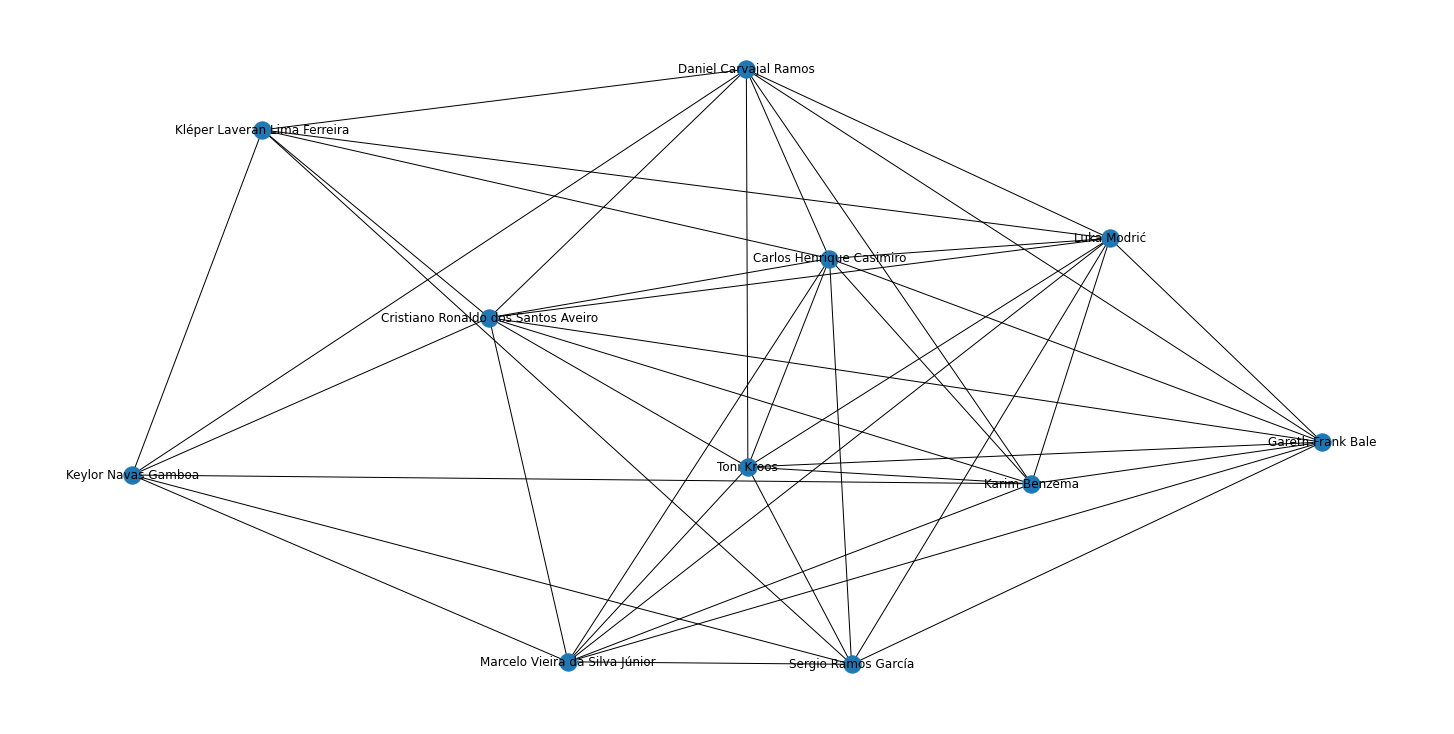

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

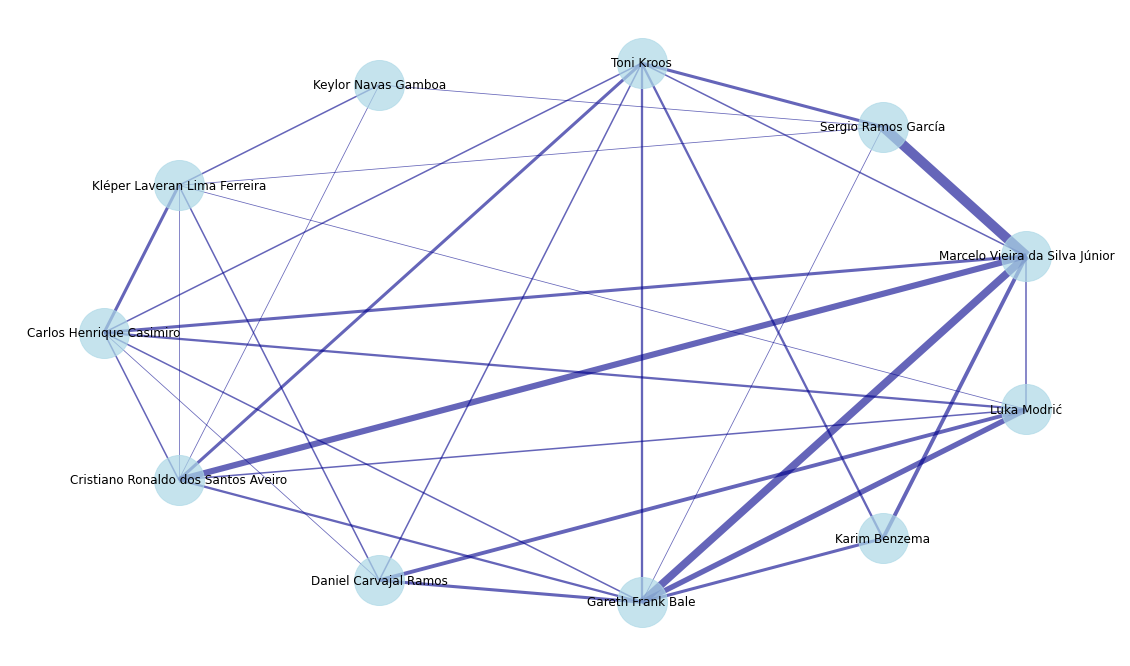

In [18]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [19]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
0,Real Madrid,Starting XI,0,NaN,NaN,NaN,NaN
2,Real Madrid,Half Start,0,NaN,NaN,NaN,NaN
4,Real Madrid,Half Start,45,NaN,NaN,NaN,NaN
6,Real Madrid,Half Start,90,NaN,NaN,NaN,NaN
8,Real Madrid,Half Start,105,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4701,Real Madrid,Injury Stoppage,50,NaN,NaN,Sergio Ramos García,NaN
4702,Real Madrid,Injury Stoppage,113,NaN,NaN,Keylor Navas Gamboa,NaN
4703,Real Madrid,Shield,63,"[2.0, 25.0]",NaN,Kléper Laveran Lima Ferreira,NaN
4704,Real Madrid,50/50,95,"[93.0, 7.0]",NaN,Cristiano Ronaldo dos Santos Aveiro,NaN


In [20]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
18,Real Madrid,Pass,1,"[42.0, 9.0]","[51.0, 6.0]",Sergio Ramos García,Toni Kroos
19,Real Madrid,Pass,1,"[50.0, 6.0]","[51.0, 27.0]",Toni Kroos,Carlos Henrique Casimiro
20,Real Madrid,Pass,1,"[49.0, 30.0]","[49.0, 48.0]",Carlos Henrique Casimiro,Luka Modrić
21,Real Madrid,Pass,1,"[49.0, 48.0]","[41.0, 59.0]",Luka Modrić,Kléper Laveran Lima Ferreira
22,Real Madrid,Pass,1,"[42.0, 57.0]","[33.0, 27.0]",Kléper Laveran Lima Ferreira,Sergio Ramos García
...,...,...,...,...,...,...,...
4678,Real Madrid,Miscontrol,116,"[65.0, 41.0]",NaN,Francisco Román Alarcón Suárez,NaN
4680,Real Madrid,Miscontrol,118,"[83.0, 43.0]",NaN,Luka Modrić,NaN
4703,Real Madrid,Shield,63,"[2.0, 25.0]",NaN,Kléper Laveran Lima Ferreira,NaN
4704,Real Madrid,50/50,95,"[93.0, 7.0]",NaN,Cristiano Ronaldo dos Santos Aveiro,NaN


In [21]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
18,Real Madrid,Pass,1,"[42.0, 9.0]","[51.0, 6.0]",Sergio Ramos García,Toni Kroos,42.0,9.0
19,Real Madrid,Pass,1,"[50.0, 6.0]","[51.0, 27.0]",Toni Kroos,Carlos Henrique Casimiro,50.0,6.0
20,Real Madrid,Pass,1,"[49.0, 30.0]","[49.0, 48.0]",Carlos Henrique Casimiro,Luka Modrić,49.0,30.0
21,Real Madrid,Pass,1,"[49.0, 48.0]","[41.0, 59.0]",Luka Modrić,Kléper Laveran Lima Ferreira,49.0,48.0
22,Real Madrid,Pass,1,"[42.0, 57.0]","[33.0, 27.0]",Kléper Laveran Lima Ferreira,Sergio Ramos García,42.0,57.0
...,...,...,...,...,...,...,...,...,...
4678,Real Madrid,Miscontrol,116,"[65.0, 41.0]",NaN,Francisco Román Alarcón Suárez,NaN,65.0,41.0
4680,Real Madrid,Miscontrol,118,"[83.0, 43.0]",NaN,Luka Modrić,NaN,83.0,43.0
4703,Real Madrid,Shield,63,"[2.0, 25.0]",NaN,Kléper Laveran Lima Ferreira,NaN,2.0,25.0
4704,Real Madrid,50/50,95,"[93.0, 7.0]",NaN,Cristiano Ronaldo dos Santos Aveiro,NaN,93.0,7.0


In [22]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Carlos Henrique Casimiro,52.185345,40.594828
1,Cristiano Ronaldo dos Santos Aveiro,72.790576,31.952880
2,Daniel Carvajal Ramos,53.675000,67.191667
3,Danilo Luiz da Silva,63.359155,68.556338
4,Francisco Román Alarcón Suárez,72.162791,34.155039
5,Gareth Frank Bale,76.312796,44.658768
6,Karim Benzema,78.721854,35.072848
7,Keylor Navas Gamboa,7.688172,41.258065
8,Kléper Laveran Lima Ferreira,42.013986,53.559441
9,Lucas Vázquez Iglesias,71.548387,65.881720


In [23]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [24]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Carlos Henrique Casimiro,52.185345,40.594828,59.405172
1,Cristiano Ronaldo dos Santos Aveiro,72.790576,31.952880,68.047120
2,Daniel Carvajal Ramos,53.675000,67.191667,32.808333
3,Gareth Frank Bale,76.312796,44.658768,55.341232
4,Karim Benzema,78.721854,35.072848,64.927152
5,Keylor Navas Gamboa,7.688172,41.258065,58.741935
6,Kléper Laveran Lima Ferreira,42.013986,53.559441,46.440559
7,Luka Modrić,61.600806,54.774194,45.225806
8,Marcelo Vieira da Silva Júnior,60.133621,13.172414,86.827586
9,Sergio Ramos García,38.706667,23.260000,76.740000


In [25]:
df3.set_index('player',inplace=True)

In [26]:

!pip install highlight_text

In [27]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


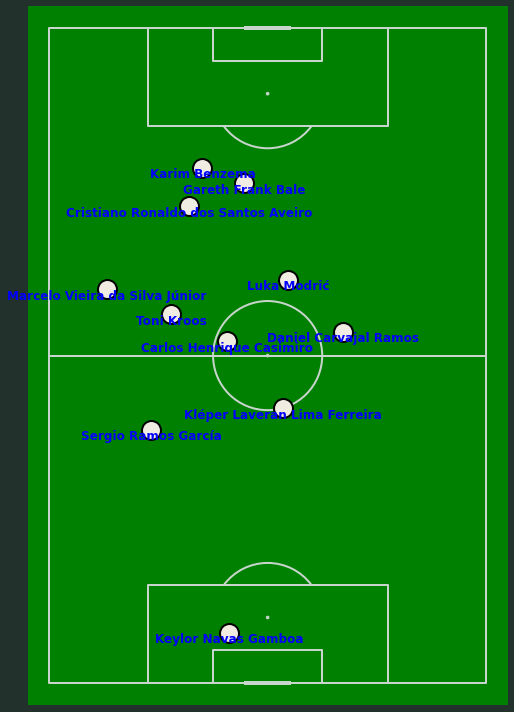

In [28]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [29]:
nx.write_gml(G, "AtleticovsRealmadrid(RM).gml")